# Regression

## In this day we will study regression algorithms in detail.

In [1]:
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')

###### Read the data

In [2]:
df = pd.read_excel('cars.xls')

### EDA

In [3]:
df.head()

Price  Mileage   Make    Model      Trim   Type  Cylinder  Liter  \
0  17314.103129     8221  Buick  Century  Sedan 4D  Sedan         6    3.1   
1  17542.036083     9135  Buick  Century  Sedan 4D  Sedan         6    3.1   
2  16218.847862    13196  Buick  Century  Sedan 4D  Sedan         6    3.1   
3  16336.913140    16342  Buick  Century  Sedan 4D  Sedan         6    3.1   
4  16339.170324    19832  Buick  Century  Sedan 4D  Sedan         6    3.1   

   Doors  Cruise  Sound  Leather  
0      4       1      1        1  
1      4       1      1        0  
2      4       1      1        0  
3      4       1      0        0  
4      4       1      0        1

In [4]:
shape = df.shape
print(f'{shape[0]} rows, {shape[1]} columns.')

804 rows, 12 columns.


In [5]:
df.sample() # random row

Price  Mileage   Make        Model                 Trim   Type  \
77  23406.68982    25387  Buick  Park Avenue  Special Ed Ultra 4D  Sedan   

    Cylinder  Liter  Doors  Cruise  Sound  Leather  
77         6    3.8      4       1      0        1

In [6]:
df.info() # Information about the type of data each column holds.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 804 entries, 0 to 803
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     804 non-null    float64
 1   Mileage   804 non-null    int64  
 2   Make      804 non-null    object 
 3   Model     804 non-null    object 
 4   Trim      804 non-null    object 
 5   Type      804 non-null    object 
 6   Cylinder  804 non-null    int64  
 7   Liter     804 non-null    float64
 8   Doors     804 non-null    int64  
 9   Cruise    804 non-null    int64  
 10  Sound     804 non-null    int64  
 11  Leather   804 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 75.5+ KB


In [7]:
df.describe() # Statistical values for each column.

Price       Mileage    Cylinder       Liter       Doors  \
count    804.000000    804.000000  804.000000  804.000000  804.000000   
mean   21343.143767  19831.934080    5.268657    3.037313    3.527363   
std     9884.852801   8196.319707    1.387531    1.105562    0.850169   
min     8638.930895    266.000000    4.000000    1.600000    2.000000   
25%    14273.073870  14623.500000    4.000000    2.200000    4.000000   
50%    18024.995019  20913.500000    6.000000    2.800000    4.000000   
75%    26717.316636  25213.000000    6.000000    3.800000    4.000000   
max    70755.466717  50387.000000    8.000000    6.000000    4.000000   

           Cruise       Sound     Leather  
count  804.000000  804.000000  804.000000  
mean     0.752488    0.679104    0.723881  
std      0.431836    0.467111    0.447355  
min      0.000000    0.000000    0.000000  
25%      1.000000    0.000000    0.000000  
50%      1.000000    1.000000    1.000000  
75%      1.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000

###### The correlation between the values. We can see from here that as cylinder size increases, the cars value goes up. Similiarly, as the amount of doors in a car increases, the value of the car goes down.

In [8]:
corr = df.corr(numeric_only=True)
corr

Price   Mileage  Cylinder     Liter     Doors    Cruise  \
Price     1.000000 -0.143051  0.569086  0.558146 -0.138750  0.430851   
Mileage  -0.143051  1.000000 -0.029461 -0.018641 -0.016944  0.025037   
Cylinder  0.569086 -0.029461  1.000000  0.957897  0.002206  0.354285   
Liter     0.558146 -0.018641  0.957897  1.000000 -0.079259  0.377509   
Doors    -0.138750 -0.016944  0.002206 -0.079259  1.000000 -0.047674   
Cruise    0.430851  0.025037  0.354285  0.377509 -0.047674  1.000000   
Sound    -0.124348 -0.026146 -0.089704 -0.065527 -0.062530 -0.091730   
Leather   0.157197  0.001005  0.075520  0.087332 -0.061969 -0.070573   

             Sound   Leather  
Price    -0.124348  0.157197  
Mileage  -0.026146  0.001005  
Cylinder -0.089704  0.075520  
Liter    -0.065527  0.087332  
Doors    -0.062530 -0.061969  
Cruise   -0.091730 -0.070573  
Sound     1.000000  0.165444  
Leather   0.165444  1.000000

###### The correlation can be better visualized using a heatmap.

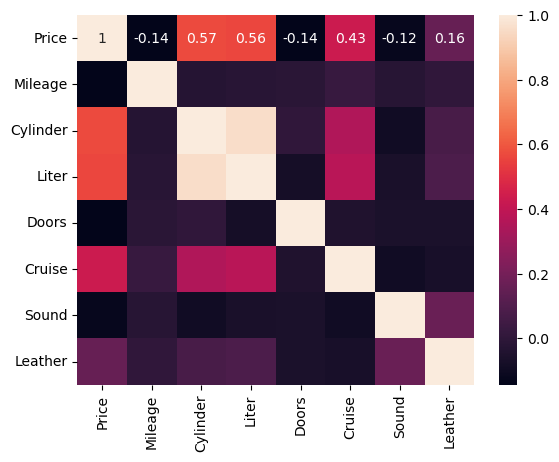

In [9]:
import seaborn as sns

sns.heatmap(corr, annot=True);

In [10]:
df['Price'].describe()

count      804.000000
mean     21343.143767
std       9884.852801
min       8638.930895
25%      14273.073870
50%      18024.995019
75%      26717.316636
max      70755.466717
Name: Price, dtype: float64

###### We can exrtract the above data manually

In [11]:
df['Price'].mean(), df['Price'].std(), df['Price'].median()

(21343.143767325837, 9884.852800898007, 18024.995019071903)

###### See how many null values there are for each column

In [12]:
df.isnull().sum()

Price       0
Mileage     0
Make        0
Model       0
Trim        0
Type        0
Cylinder    0
Liter       0
Doors       0
Cruise      0
Sound       0
Leather     0
dtype: int64

###### What are the diffrenet car brands in this data?

In [13]:
df['Make'].unique()

array(['Buick', 'Cadillac', 'Chevrolet', 'Pontiac', 'SAAB', 'Saturn'],
      dtype=object)

###### And how many different car brands do we have?

In [14]:
df['Make'].nunique()

6

###### How many cars of each brand there is?

In [15]:
df['Make'].value_counts()

Make
Chevrolet    320
Pontiac      150
SAAB         114
Buick         80
Cadillac      80
Saturn        60
Name: count, dtype: int64

###### Lets see this with percentages

In [16]:
df['Make'].value_counts(normalize=True)

Make
Chevrolet    0.398010
Pontiac      0.186567
SAAB         0.141791
Buick        0.099502
Cadillac     0.099502
Saturn       0.074627
Name: proportion, dtype: float64

###### Lets visualize this data

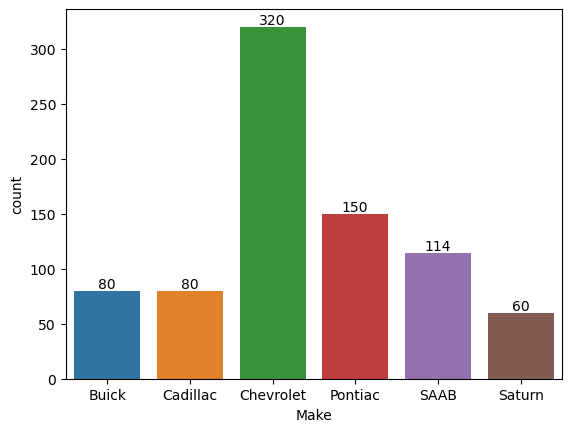

In [17]:
import seaborn as sns

ax = sns.countplot(x=df['Make'])
ax.bar_label(ax.containers[0]);

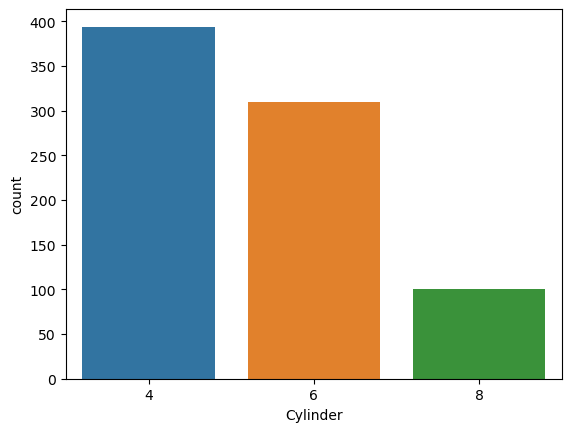

In [18]:
sns.countplot(x=df['Cylinder']);

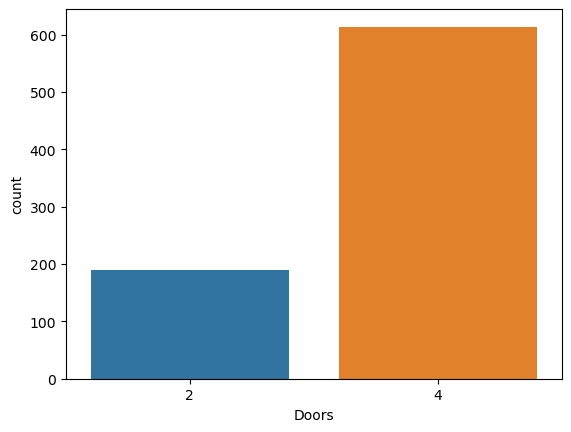

In [19]:
sns.countplot(x=df['Doors']);

###### A graph of every row and column against itself

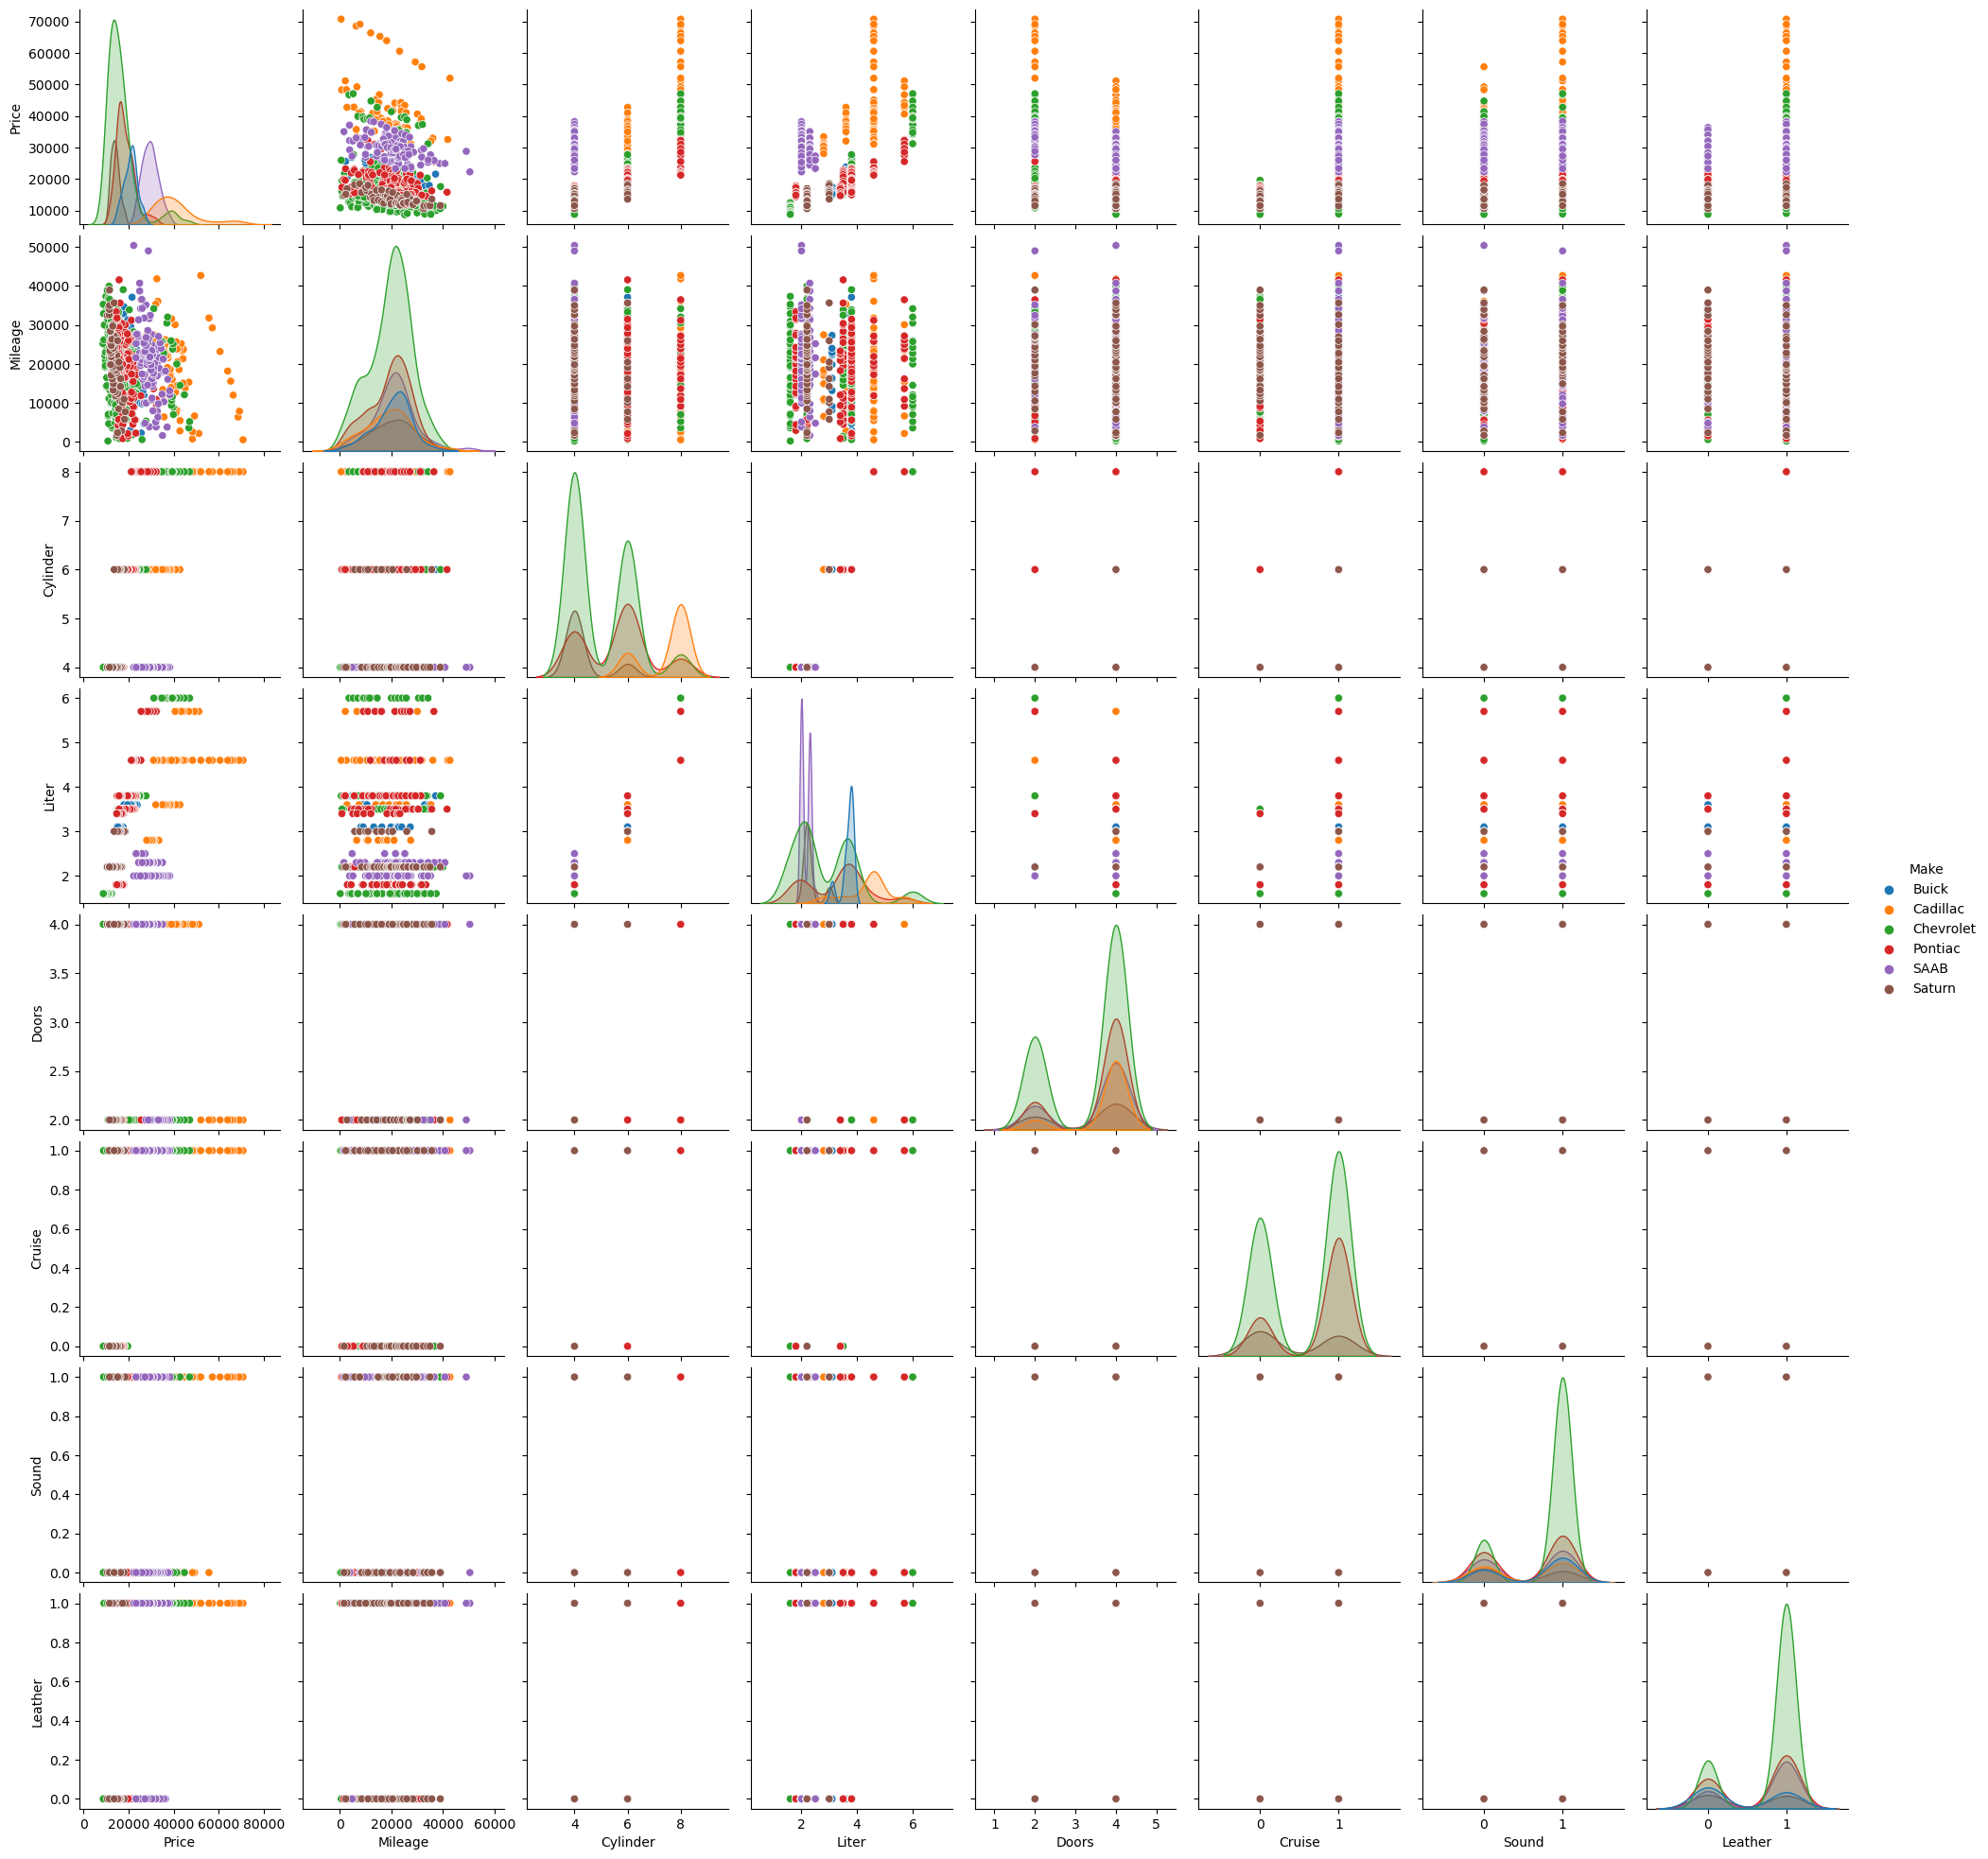

In [21]:
sns.pairplot(df, hue='Make');

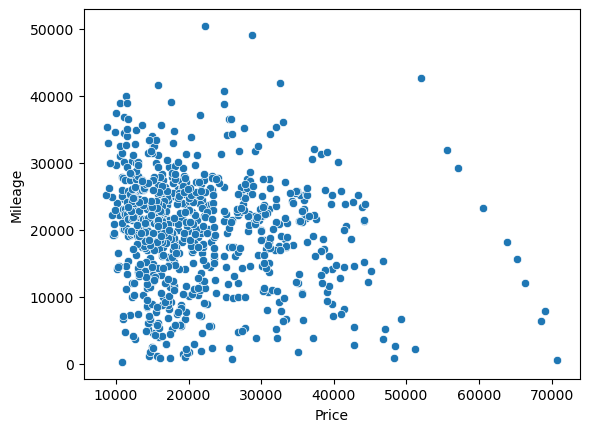

In [24]:
sns.scatterplot(x='Price', y='Mileage', data=df);

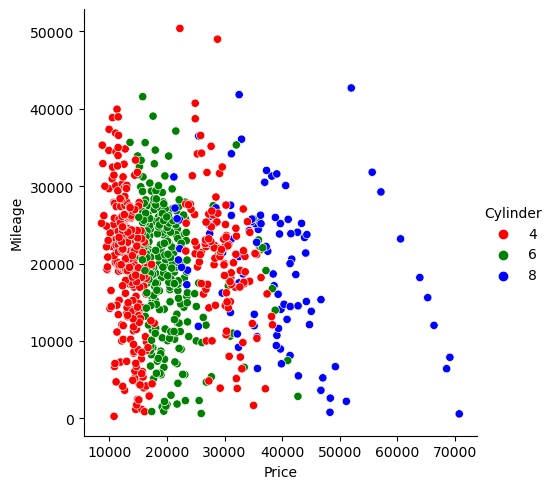

In [28]:
# Custom color palette
colors = {
    4: 'r',
    6: 'g',
    8: 'b'
}

sns.relplot(x='Price', y='Mileage', hue='Cylinder', palette=colors, data=df);

## P Value

H0: There is no relation between the cars price and its mileage
<br>
Ha: There is a relation between the cars price and its mileage
###### If the p-value is less than 0.05, we accept the alternative hypothesis.

In [29]:
from scipy.stats import ttest_ind

In [31]:
_, p = ttest_ind(df['Price'], df['Mileage'])
if p < 0.05:
    print('We determined that there is a relation between the price and of mileage of a car.')

We determined that there is a relation between the price and of mileage of a car.


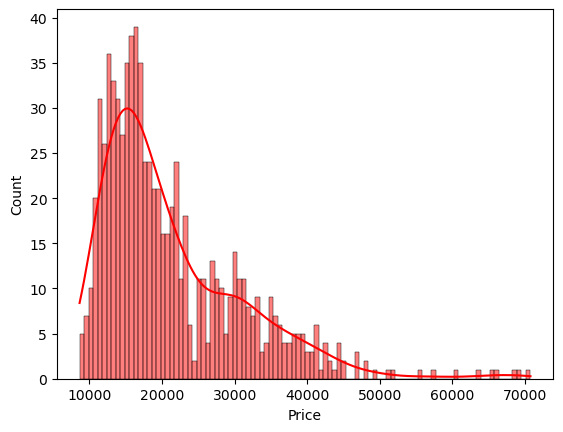

In [36]:
sns.histplot(x=df['Price'], kde=True, color='red', bins=100);

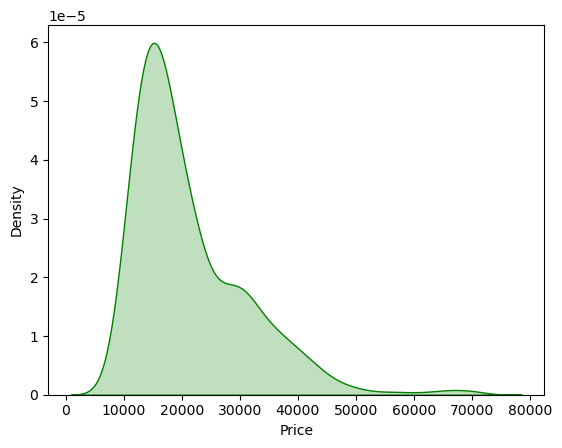

In [38]:
sns.kdeplot(x=df['Price'], fill=True, color='green');

###### A boxplot helps us visualize outliers.

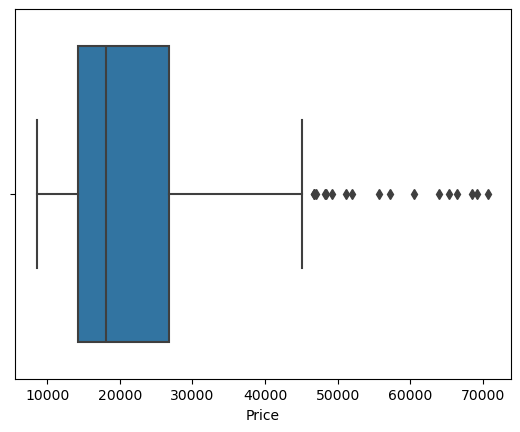

In [40]:
sns.boxplot(x=df['Price']);

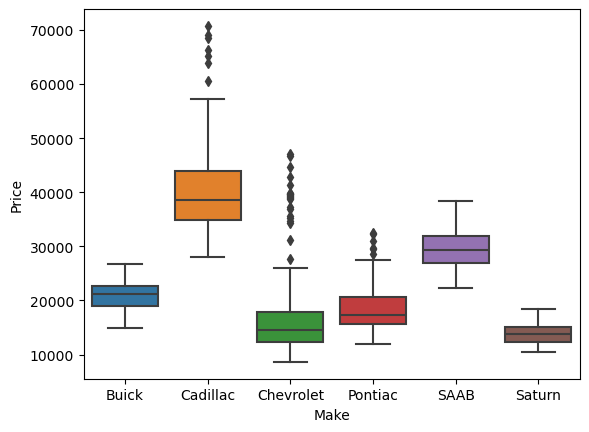

In [42]:
sns.boxplot(x='Make', y='Price', data=df);

###### Violinplot shows the distribution of the values.

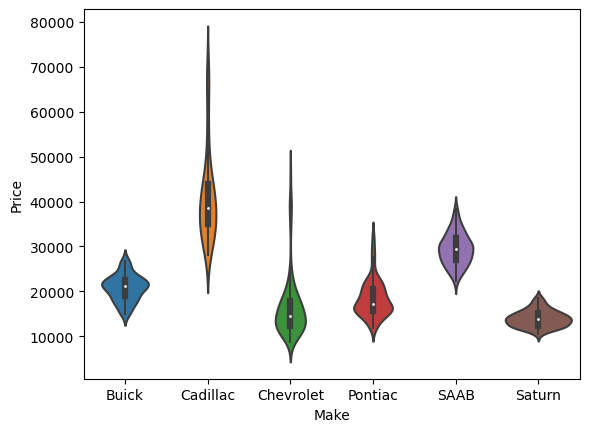

In [43]:
sns.violinplot(x='Make', y='Price', data=df);

###### Some 3d graphs

In [46]:
import plotly.express as px

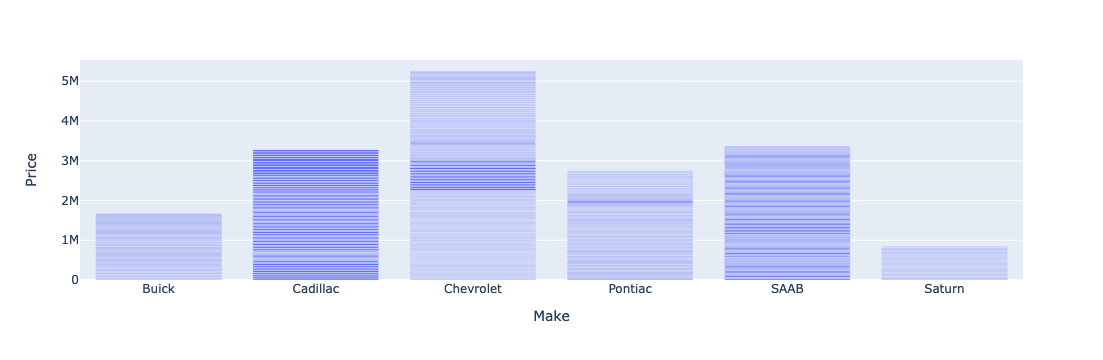

In [49]:
px.bar(df, x='Make', y='Price')

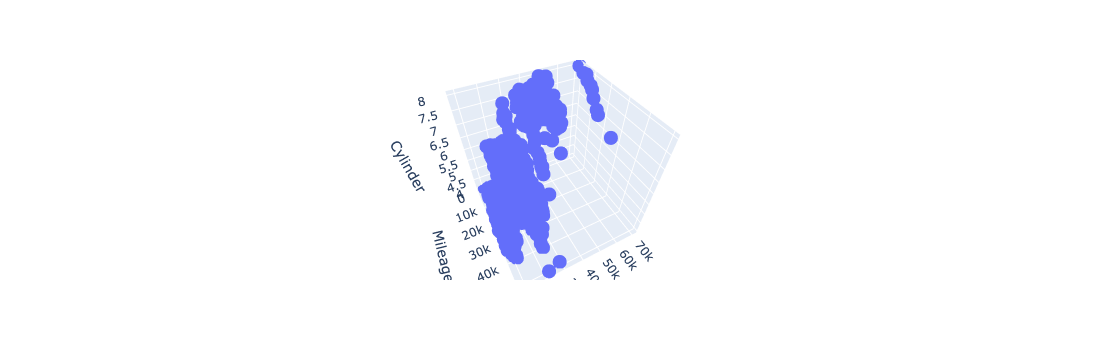

In [48]:
px.scatter_3d(df, x='Mileage', y='Price', z='Cylinder')

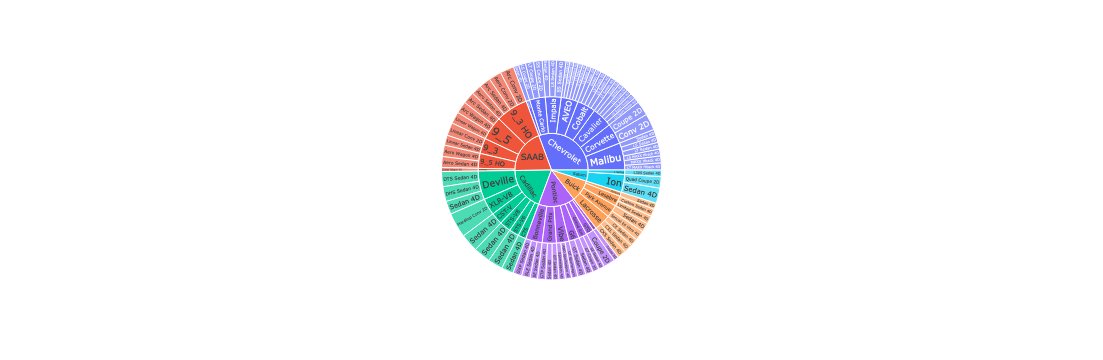

In [50]:
px.sunburst(df, path=['Make', 'Model', 'Trim'], values='Price')

## Feature Engineering

In [51]:
df.corr(numeric_only=True)

Price   Mileage  Cylinder     Liter     Doors    Cruise  \
Price     1.000000 -0.143051  0.569086  0.558146 -0.138750  0.430851   
Mileage  -0.143051  1.000000 -0.029461 -0.018641 -0.016944  0.025037   
Cylinder  0.569086 -0.029461  1.000000  0.957897  0.002206  0.354285   
Liter     0.558146 -0.018641  0.957897  1.000000 -0.079259  0.377509   
Doors    -0.138750 -0.016944  0.002206 -0.079259  1.000000 -0.047674   
Cruise    0.430851  0.025037  0.354285  0.377509 -0.047674  1.000000   
Sound    -0.124348 -0.026146 -0.089704 -0.065527 -0.062530 -0.091730   
Leather   0.157197  0.001005  0.075520  0.087332 -0.061969 -0.070573   

             Sound   Leather  
Price    -0.124348  0.157197  
Mileage  -0.026146  0.001005  
Cylinder -0.089704  0.075520  
Liter    -0.065527  0.087332  
Doors    -0.062530 -0.061969  
Cruise   -0.091730 -0.070573  
Sound     1.000000  0.165444  
Leather   0.165444  1.000000

###### The correlation of every column with Price.

In [55]:
abs(df.corr(numeric_only=True)['Price'].sort_values(ascending=False))

Price       1.000000
Cylinder    0.569086
Liter       0.558146
Cruise      0.430851
Leather     0.157197
Sound       0.124348
Doors       0.138750
Mileage     0.143051
Name: Price, dtype: float64

In [56]:
x = df[['Mileage', 'Cylinder', 'Liter', 'Cruise']]
y = df[['Price']]

In [57]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [62]:
x_train.shape

(643, 4)

###### We can see from here that 80% of our data is reserved for train.

In [63]:
x_train.shape[0] / df.shape[0]

0.7997512437810945

In [65]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

###### Machine Learning - The machine studies the given data.

In [66]:
model = lr.fit(x_train, y_train)

In [70]:
pred = model.predict(x_test)

In [74]:
from sklearn.metrics import r2_score, mean_squared_error

In [84]:
mean_squared_error(y_test, pred) ** 0.5

7413.255792158803

In [85]:
r2_score(y_test, pred) # 30% percent success rate - not very good

0.3071114906997998

###### Lets improve this by incorprating make and trim

In [86]:
x = df[['Mileage', 'Cylinder', 'Liter', 'Cruise', 'Make', 'Trim']]
y = df[['Price']]

In [89]:
x = pd.get_dummies(x, drop_first=True)
x.head()

Mileage  Cylinder  Liter  Cruise  Make_Cadillac  Make_Chevrolet  \
0     8221         6    3.1       1          False           False   
1     9135         6    3.1       1          False           False   
2    13196         6    3.1       1          False           False   
3    16342         6    3.1       1          False           False   
4    19832         6    3.1       1          False           False   

   Make_Pontiac  Make_SAAB  Make_Saturn  Trim_Aero Conv 2D  ...  \
0         False      False        False              False  ...   
1         False      False        False              False  ...   
2         False      False        False              False  ...   
3         False      False        False              False  ...   
4         False      False        False              False  ...   

   Trim_Quad Coupe 2D  Trim_SE Sedan 4D  Trim_SLE Sedan 4D  Trim_SS Coupe 2D  \
0               False             False              False             False   
1               False             False              False             False   
2               False             False              False             False   
3               False             False              False             False   
4               False             False              False             False   

   Trim_SS Sedan 4D  Trim_SVM Hatchback 4D  Trim_SVM Sedan 4D  Trim_Sedan 4D  \
0             False                  False              False           True   
1             False                  False              False           True   
2             False                  False              False           True   
3             False                  False              False           True   
4             False                  False              False           True   

   Trim_Special Ed Ultra 4D  Trim_Sportwagon 4D  
0                     False               False  
1                     False               False  
2                     False               False  
3                     False               False  
4                     False               False  

[5 rows x 55 columns]

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [91]:
model = lr.fit(x_train, y_train)

In [92]:
pred = model.predict(x_test)

In [93]:
mean_squared_error(y_test, pred) ** 0.5

1523.6314728711297

In [96]:
r2_score(y_test, pred) # 97% success rate is very good

0.9707311770106379

#### The above is a good demonstration of making a price estimation. However for even better resulst we must use additional models.

In [134]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [135]:
r = Ridge()
l = Lasso()
en = ElasticNet()
dtr = DecisionTreeRegressor()
etr = ExtraTreesRegressor()

In [102]:
r_model = r.fit(x_train, y_train)
r_pred = r_model.predict(x_test)

In [103]:
mean_squared_error(y_test, r_pred) ** 0.5

1575.6786242840062

In [105]:
r2_score(y_test, r_pred) # Almost identical to LinearRegression

0.9686973810318732

In [125]:
def test_models(models, x_train, x_test, y_train, y_test):
    for model in models:
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        
        rmse = mean_squared_error(y_test, pred)
        print(f'rmse for {str(model)[:-2]} is {rmse}')

        r2 = r2_score(y_test, pred)
        print(f'r2 score for {str(model)[:-2]} is {r2}')
        print()

In [136]:
test_models([r, l, en, lr, dtr, etr], x_train, x_test, y_train, y_test)

rmse for Ridge is 2482763.127025538
r2 score for Ridge is 0.9686973810318732

rmse for Lasso is 2331860.607360505
r2 score for Lasso is 0.9705999564419019

rmse for ElasticNet is 35000495.45039332
r2 score for ElasticNet is 0.558714578586518

rmse for LinearRegression is 2321452.865123448
r2 score for LinearRegression is 0.9707311770106379

rmse for DecisionTreeRegressor is 3275832.5685235285
r2 score for DecisionTreeRegressor is 0.9586983802120815

rmse for ExtraTreesRegressor is 873101.2773256183
r2 score for ExtraTreesRegressor is 0.9889919596810464



### Coefficients

In [112]:
lr.coef_

array([[-1.98809431e-01, -2.60219053e+03,  7.38331957e+03,
        -1.05024563e+02,  1.55364461e+04, -2.81688090e+03,
        -3.59594608e+03,  6.85100028e+03, -2.29878609e+03,
         3.90588224e+03, -2.64773527e+03, -1.26995361e+03,
         7.05993990e+03, -2.22310734e+02,  1.38127365e+02,
        -8.04390904e+03, -6.79607391e+03, -6.85437716e+03,
         3.54018314e+03, -5.72790226e+03, -1.11979437e+04,
        -8.32030557e+03, -7.59431897e+03, -8.10925499e+03,
        -6.53924263e+03, -3.82628105e+02, -5.76220228e+03,
        -3.63992297e+03,  1.67584142e+04, -5.32327214e+03,
        -7.83067529e+03, -4.64523486e+03, -7.53303979e+03,
        -6.65186020e+03, -7.63546793e+03, -6.87040602e+03,
        -6.33606759e+03, -3.92489639e+03, -7.03882417e+03,
        -6.17480932e+03, -8.14421976e+03,  4.52867027e+03,
        -2.53728086e+03, -2.10433902e+03, -7.88530569e+03,
        -6.07227049e+03, -6.65263910e+03, -5.53516395e+03,
        -4.78023915e+03, -3.13661125e+03, -6.92039280e+0

In [116]:
feature_importance = pd.DataFrame({ 'feature': x_train.columns, 'coefs': lr.coef_[0] })
feature_importance = feature_importance.sort_values(by='coefs', ascending=False)

In [118]:
feature_importance.head()

feature         coefs
28  Trim_Hardtop Conv 2D  16758.414214
4          Make_Cadillac  15536.446130
2                  Liter   7383.319566
12      Trim_Arc Conv 2D   7059.939896
7              Make_SAAB   6851.000276

In [127]:
import matplotlib.pyplot as plt

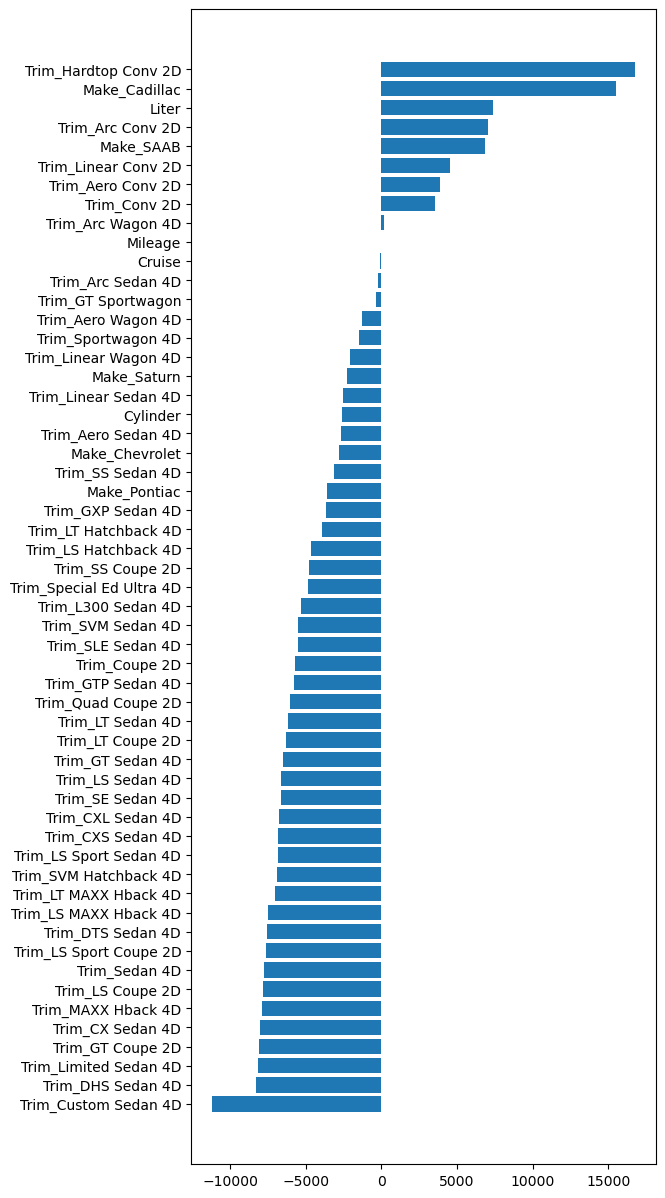

In [128]:
plt.figure(figsize=(6, 15))
plt.barh(feature_importance['feature'], feature_importance['coefs'])
plt.gca().invert_yaxis()

### Indicators of success in Regression:
1. $ R^{2}$ score > 0.85 (or 85%).}
2. Low RMSE.
3. Residuals should follow normal distribution.